## Introduction to linear regression

Based on the example given in http://onlinestatbook.com/2/regression/intro.html

In [7]:
import numpy as np
import matplotlib.pyplot as plt
# allows to use everything from Numpy and Matplotlib like in Matlab, without np. and plt.

from IPython.display import Image 
# allows to show images from the web: Image(filename='hysteresis_example.png',width=400)

In [8]:
# Let's use some simple example of two variables, x,y
x = np.array([1.0, 2.0, 3.0, 4.0, 5.0])
y = np.array([1.0, 2.0, 1.30, 3.75, 2.25])

Text(0, 0.5, '$y$')

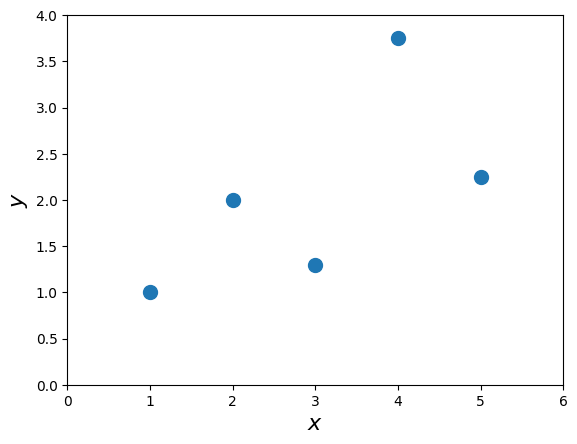

In [9]:
plt.plot(x,y,'o',markersize=10)
plt.xlim([0.0, 6.0])
plt.ylim([0.0, 4.0])
plt.xlabel('$x$',fontsize=16)
plt.ylabel('$y$',fontsize=16)

In simple linear regression, the topic of this section, the predictions of Y when plotted as a function of X form a straight line.
Linear regression consists of finding the best-fitting straight line through the points. The best-fitting line is called a regression line. The black diagonal line in Figure 2 is the regression line and consists of the predicted score on Y for each possible value of X. The vertical lines from the points to the regression line represent the errors of prediction.

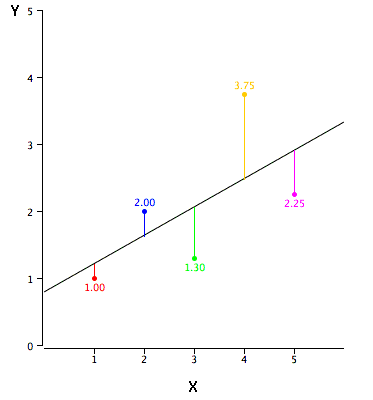

In [10]:
# Image(url='http://onlinestatbook.com/2/regression/graphics/reg_error.gif')
Image(filename='../img/reg_error.png',width=400)

The error of prediction for a point is the value of the point minus the predicted value (the value on the line). Table 2 shows the predicted values (Y') and the errors of prediction (Y-Y'). For example, the first point has a Y of 1.00 and a predicted Y (called Y') of 1.21. Therefore, its error of prediction is -0.21.

The formula for the regression line is 

$$ y' = b \cdot x + a $$

Let's assume we try some values of $a,b$: 

$$ y' = 0.425\, x + 0.758 $$

In [11]:
b = 0.425
a = 0.785

ytag = x*b + a
print("y'" % ytag)
print('original y:' % y)

y'
original y:


In [12]:
e = ytag - y
print('Errors:' % e)

Errors:


### Computing the Regression Line

In the age of computers, the regression line is typically computed with statistical software. However, the calculations are relatively easy, and are given here for anyone who is interested. The calculations are based on the statistics shown in Table 3. $M_x$ is the mean of $X$, $M_y$ is the mean of $Y$, $S_x$ is the standard deviation of $X$, $S_y$ is the standard deviation of $Y$, and $r$ is the correlation between $X$ and $Y$.

### Formulae for standard deviations and correlation

$$ S_x = \frac{1}{N} \sum (x-\bar{x})^2 $$

$$ S_y = \frac{1}{N} \sum (y-\bar{y})^2 $$

$$ R = \frac{1}{S_x S_y} \sum (x-\bar{x})(y - \bar{y}) $$


In [13]:
Mx = mean(x)
My = mean(y)
Sx = std(x,ddof=1) # note the ddof=1 which means N-1 
Sy = std(y,ddof=1)
Sxy = corrcoef(x,y)
R = Sxy[0,1] # off-diagonal is the correlation coefficient
print('%4.3f %4.3f %4.3f %4.3f %4.3f' % (Mx,My,Sx,Sy,R))

NameError: name 'mean' is not defined

$$ b = R \; Sy/Sx $$
$$ a = \bar{y} - b \bar{x} $$

In [ ]:
b = R*Sy/Sx; print('b = %4.3f' % b)
a = My - b*Mx; print('a = %4.3f'% a)

## Regression analysis
Following the recipe of http://www.answermysearches.com/how-to-do-a-simple-linear-regression-in-python/124/

In [ ]:
# %load ../scripts/linear_regression.py
from numpy import sqrt

def linreg(X, Y):
    """
    Summary
        Linear regression of y = ax + b
    Usage
        real, real, real = linreg(list, list)
    Returns coefficients to the regression line "y=ax+b" from x[] and y[], and R^2 Value
    """
    N = len(X)

    if N != len(Y):  raise(ValueError, 'unequal length')

    Sx = Sy = Sxx = Syy = Sxy = 0.0
    for x, y in zip(X, Y):
        Sx = Sx + x
        Sy = Sy + y
        Sxx = Sxx + x*x
        Syy = Syy + y*y
        Sxy = Sxy + x*y

    det =  Sx * Sx - Sxx * N # see the lecture

    a,b = (Sy * Sx - Sxy * N)/det, (Sx * Sxy - Sxx * Sy)/det

    meanerror = residual = residualx = 0.0

    for x, y in zip(X, Y):
        meanerror = meanerror + (y - Sy/N)**2
        residual = residual + (y - a * x - b)**2
        residualx = residualx + (x - Sx/N)**2

    RR = 1 - residual/meanerror
    # linear regression, a_0, a_1 => m = 1
    m = 1
    nu = N - (m+1)

    sxy = sqrt(residual / nu)

    # Var_a, Var_b = ss * N / det, ss * Sxx / det

    Sa = sxy * sqrt(1/residualx)
    Sb = sxy * sqrt(Sxx/(N*residualx))


    # We work with t-distribution, ()
    # t_{nu;\alpha/2} = t_{3,95} = 3.18

    print("Estimate: y = ax + b")
    print("N = %d" % N)
    print("Degrees of freedom $\\nu$ = %d " % nu)
    print("a = %.2f $\\pm$ %.3f" % (a, 3.18*Sa/sqrt(N)))
    print("b = %.2f $\\pm$ %.3f" % (b, 3.18*Sb/sqrt(N)))
    print("R^2 = %.3f" % RR)
    print("Sxy = %.3f" % sxy)
    print("y = %.2f x + %.2f $\\pm$ %.2fV" % (a, b, 3.18*sxy/sqrt(N)))
    return a, b, RR, sxy

In [ ]:
a, b, RR, sxy = linreg(x,y)

### Standardized Variables

The regression equation is simpler if variables are **standardized** so that their means are equal to 0 and standard deviations are equal to 1, for then $b = r$ and $a = 0$. This makes the regression line:

$$ Z_y = (R)(Z_x) $$

where $Z_y = y - \bar{y}$, $Z_x = x - \bar{x}$, $R$ is the correlation, Note that the slope of the regression equation for standardized variables is $R$.

In [ ]:
figure(figsize=(10,8))
plot(x,y,'o',markersize=8)
xlim([0.0, 6.0])
ylim([0.0, 4.0])
xlabel('$x$',fontsize=16)
ylabel('$y$',fontsize=16)
plot(x,ytag,'-',lw=2)
legend((r'$y$',r"$y'$"),fontsize=16)

# Estimate $a,b$ and also $\Delta a$ and $\Delta b$

We start with the list of $N$ points $x_i,y_i$ and we assume that the errors in $\Delta x \ll \Delta y$. Our goal is to minimize the sum of all the deviations, $d_i = y_i - (a x_i + b)$

For that, we shall minimize the sum of square errors: $$ S^2 = \sum\limits_{i=1}^{N} d_i^2 = \sum\limits_{i=1}^{N} \left( y_i - a x_i - b \right)^2$$

In order to find those we need to derive $S^2$ by $b$ and by $a$ and solving for zero we get two equations that provide us the minimum. The equations we get are: $$a = \frac{1}{A}\left(N S_{xy} - S_y S_x \right) $$ $$b = \frac{1}{A} \left(S_{xx} S_{y} - S_{xy} S_x \right) $$ 
where
$$S_x = \sum\limits_{i=1}^{N} x_i $$
$$S_y = \sum\limits_{i=1}^{N} y_i $$
$$S_{xx} = \sum\limits_{i=1}^{N} x_i^2 $$
$$S_{yy} = \sum\limits_{i=1}^{N} y_i^2 $$
$$S_{xy} = \sum\limits_{i=1}^{N} x_i y_i $$
$$A \equiv N S_{xx} - S_x^2 $$


Then we can measure both $a$ and $\Delta a$: $$ \Delta a = \sigma_y \sqrt{N/A} $$ $$\Delta b = \sigma_y \sqrt{S_{xx}/A}$$

and the error is $$\Delta y = \frac{1}{N} \sum\limits_{i=1}^{N} \Delta y_i $$ and the deviation of the errors is 
$$ \sigma_y = \sqrt{\frac{1}{N-2}\sum d_i^2} = $$ 
$$ = \sqrt{\frac{1}{N-2}\left(S_{yy} + a^2 S_{xx} +Nb^2 - 2aS_{xy} -2bS_{y} + 2abS_x \right) }$$

### Example

In [ ]:
import numpy as np
x = np.arange(2.,11.)
y = np.array([14.5, 16.0, 18.5, 20.0, 22.5, 24.5, 26.0, 27.0, 29.0])

### let's assume $\Delta x = 0$, $\Delta y = 0.2$

In [ ]:


Sx = np.sum(x)
Sy = np.sum(y)
Sxx = np.sum(x**2)
Syy = np.sum(y**2)
Sxy = np.sum(x*y)
N = x.size
A = N*Sxx - Sx**2

In [ ]:
a = 1./A*(N*Sxy - Sy*Sx)
b = 1./A*(Sxx*Sy - Sxy*Sx)
print('a,b = %3.2f,%3.2f' % (a,b))

In [ ]:
d = (y - (a*x + b))

In [ ]:
pl.plot(x,y,'o',x,a*x+b,'--')

In [ ]:
sigma = np.sqrt((1./(N-2)*np.sum(d**2)))
print('sigma_y = %4.3f' % sigma)

In [ ]:
delta_y = 0.2
delta_a = sigma * np.sqrt(N/A); print('\\Delta a = %4.3f' % delta_a)
delta_b = sigma * np.sqrt(Sxx/A); print('\\Delta b = %4.3f' % delta_b)

### Final result is:

$$ a = 1.84 \pm 0.06 $$
 
$$ b = 10.95 \pm 0.46 $$

This notebook provides an in-depth explanation and practical Python implementation of **Linear Least-Squares Fitting**, focusing on its role in Mechanical Engineering Measurements and Metrology, as covered in Section 5.2 of the provided text.

The core idea of least-squares, introduced in the fruit weights example (Section 5.2.1), is now extended to fitting a straight line, which is the foundation of linear regression.

## 5.2 The Least-Squares Model and Linear Regression

### Concept Explanation: Why Linear Regression?

In many measurement situations, an engineer wants to understand the relationship between two physical quantities, $x$ and $y$. This relationship is often assumed to be **linear**:

$$y = a + bx$$

*   $y$: The **Response Variable** (often what is measured, e.g., Voltage, Resistance).
*   $x$: The **Explanatory (or Predictor) Variable** (often controlled or easily measured, e.g., Time, Temperature).
*   $a$: The **Intercept** (the value of $y$ when $x=0$).
*   $b$: The **Slope** (the rate of change of $y$ with respect to $x$, often the quantity of interest, e.g., temperature coefficient, drift rate).

Due to unavoidable random errors ($\epsilon_i$), measured data points $(x_i, y_i)$ will not fall exactly on a straight line. The data follows the model:

$$\text{Measured Value } (y_i) = \text{Function of Parameters} (a + bx_i) + \text{Scatter } (\epsilon_i)$$

**Least-Squares fitting** is the method used to find the "best" estimates for the parameters $a$ and $b$ by minimizing the sum of the squares of the vertical distances (the residuals, $\epsilon_i$) between the observed data points $y_i$ and the line $\hat{y}_i = a + b x_i$.

$$\text{Minimize } Q = \sum_{i=1}^{n} \epsilon_i^2 = \sum_{i=1}^{n} (y_i - (a + bx_i))^2$$

To find the minimum, we set the partial derivatives of $Q$ with respect to $a$ and $b$ to zero, yielding a system of two linear equations (the "Normal Equations") that can be solved for $a$ and $b$.

### Implementation: Linear Regression with NumPy

We will use the convenient `numpy.polyfit` and `numpy.polyval` functions, which implement the least-squares method for polynomial fitting (where a straight line is a first-order polynomial).

---

## Example 1: Voltage Standard Drift (Table 5.2)

**Purpose:** Estimate the intercept ($V_0$) and drift rate ($b$) of a nominal 10-V voltage standard over time using least-squares fitting. The drift rate $b$ is the parameter of primary interest.

**Measurand Model:** $V = V_0 + bt$, where $V$ is the voltage (in $\mu V/V$ above $10V$) and $t$ is the time (in years). This matches the linear form $y = a + bx$.

| Time, $t$ (years) ($x$) | Voltage, $V$ ($\mu V/V$) ($y$) |
| :---------------------- | :----------------------------- |
| 0.79                    | 2.2                            |
| 1.89                    | 2.5                            |
| 3.17                    | 2.8                            |
| 4.62                    | 3.2                            |
| 5.96                    | 3.5                            |

```python
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Data from Table 5.2
t_years = np.array([0.79, 1.89, 3.17, 4.62, 5.96])
V_uV = np.array([2.2, 2.5, 2.8, 3.2, 3.5])
n = len(t_years)

# 1. Least-Squares Fit to find parameters V0 and b (y = a + bx)
# np.polyfit(x, y, degree) returns [slope (b), intercept (a)]
params, residuals, _, _, _ = np.polyfit(t_years, V_uV, 1, full=True)
b_drift = params[0]
V0_intercept = params[1]

# Text Solution (Eq 5.43): V0 = 2.01058 µV/V, b = 0.25241 µV/V/yr
print("--- Least-Squares Fitting: Voltage Drift (Table 5.2) ---")
print(f"Calculated Intercept (V₀ = a): {V0_intercept:.5f} µV/V (Text: 2.01058)")
print(f"Calculated Slope (b, Drift Rate): {b_drift:.5f} µV/V/yr (Text: 0.25241)")
print("-" * 40)

# 2. Standard Uncertainty of the Fit (s, RMS Residual)
# The residual sum of squares (RSS) is the first element of 'residuals'
Q_min = residuals[0]

# Degrees of freedom (v) = n - q, where q=2 (for a and b)
nu = n - 2 

# Standard deviation of the fit (s), also called RMS Residual (Eq 5.55)
s_fit = np.sqrt(Q_min / nu) # Text solution (Eq 5.49 & 5.34): s^2 = 0.0003775, s = 0.01943 µV/V

print(f"Residual Sum of Squares (Q_min): {Q_min:.6f}")
print(f"Degrees of Freedom (ν = n-2): {nu}")
print(f"Std Dev of Residuals (s): {s_fit:.5f} µV/V (Text: 0.019 µV/V)")

# 3. Standard Uncertainties of the Estimates (sa and sb)
# Requires calculating D (Eq 5.51)
sum_x = np.sum(t_years)
sum_x_sq = np.sum(t_years**2)
D = n * sum_x_sq - sum_x**2

# Standard Uncertainty in Intercept (sa) (Eq 5.57)
s_a = s_fit * np.sqrt(sum_x_sq / D)

# Standard Uncertainty in Slope (sb) (Eq 5.58)
s_b = s_fit * np.sqrt(n / D)

# Text Solution: s_a = 0.01771 µV/V, s_b = 0.00470 µV/V/yr
print("-" * 40)
print(f"Std Uncertainty in Intercept (sₐ): {s_a:.5f} µV/V (Text: 0.01771)")
print(f"Std Uncertainty in Slope (sᵦ): {s_b:.5f} µV/V/yr (Text: 0.00470)")

# 4. Correlation Coefficient (r)
# We can use the least-squares parameters to calculate correlation r (Section 5.3.2/Exercise E)
# Alternatively, use scipy for direct calculation
slope, intercept, r_value, p_value, std_err = stats.linregress(t_years, V_uV)
r = r_value

# Text Solution (Exercise E): r = +0.99948
print(f"Correlation Coefficient (r): {r:.5f} (Text: +0.99948)")
print("\nSince r is very close to +1, there is a very strong positive linear correlation between time and voltage.")


# Plotting the Linear Regression (Figure 5.4)
t_line = np.linspace(min(t_years) - 0.5, max(t_years) + 0.5, 100)
V_line = V0_intercept + b_drift * t_line

plt.figure(figsize=(8, 5))
plt.scatter(t_years, V_uV, color='black', label='Measured Data')
plt.plot(t_line, V_line, color='red', label=f'Best-Fit Line: V = {V0_intercept:.2f} + {b_drift:.3f}t')
plt.title('Figure 5.4: Dependence of Voltage on Time (Linear Least-Squares)')
plt.xlabel('Time (years)')
plt.ylabel('Voltage (μV/V above 10 V)')
plt.grid(True, linestyle='--')
plt.legend()
plt.show()
```

### Interpretation for Students

1.  **Drift Rate Significance:** The calculated drift rate ($b \approx 0.252 \ \mu V/V \cdot yr^{-1}$) is about **54 times larger** than its standard uncertainty ($s_b \approx 0.0047 \ \mu V/V \cdot yr^{-1}$). The ratio $b/s_b \approx 54$ is called the **t-statistic**. Because this value is much greater than typical critical $t$ values (e.g., $3.18$ for $\nu=3$ at 95% confidence), we conclude that the drift is **highly significant**.

2.  **Correlation:** The correlation coefficient $r \approx 0.9995$ confirms the excellent linear fit, meaning the variation in time **explains** over $99.9\%$ of the variation in voltage.

3.  **Metrology Insight:** Linear regression allowed us to quantify a systematic effect (drift). The scatter of points around the best-fit line (measured by $s_{fit}$) is the **Type A Standard Uncertainty** in the measurement, which can now be used in subsequent uncertainty budgets.

---

## Example 2: HPLC Calibration (Table 5.3)

**Purpose:** Calibrate a High-Performance Liquid Chromatography (HPLC) instrument by fitting a straight line to the measured absorbance area ($y$) as a function of known sodium chloride concentration ($x$).

**Measurand Model:** $y = a + bx$, where $y$ is the Area (Absorbance) and $x$ is the Concentration (ppm). The parameters $a$ and $b$ are the **instrument calibration parameters** (intercept and sensitivity).

| Concentration, $x$ (ppm) | Area, $y$ (arbitrary units) |
| :----------------------- | :-------------------------- |
| 1.028                    | 15900                       |
| 2.056                    | 31000                       |
| 5.141                    | 63400                       |
| 7.711                    | 99100                       |
| 10.282                   | 127000                      |
| 15.422                   | 201000                      |
| 25.704                   | 383000                      |

*Note: The Area values have been adjusted for the powers of 10 for calculation.*

```python
# Data from Table 5.3
conc_x = np.array([1.028, 2.056, 5.141, 7.711, 10.282, 15.422, 25.704])
area_y = np.array([1.59e4, 3.10e4, 6.34e4, 9.91e4, 1.27e5, 2.01e5, 3.83e5])
n_hplc = len(conc_x)

# Perform linear regression using scipy.stats for simplicity and all parameters
slope, intercept, r_value, p_value, std_err_b = stats.linregress(conc_x, area_y)
r = r_value
std_err_a = std_err_b # Placeholder: standard errors are often reported for both a and b

# Text Solution (Page 87): a = -9654.1, b = 14670.6 ppm⁻¹
print("--- Least-Squares Fitting: HPLC Calibration (Table 5.3) ---")
print(f"Calculated Intercept (a): {intercept:.1f} (Text: -9654.1)")
print(f"Calculated Slope (b): {slope:.1f} ppm⁻¹ (Text: 14670.6)")
print(f"Correlation Coefficient (r): {r:.5f}")
print("-" * 40)

# Plotting the Linear Regression
x_line = np.linspace(min(conc_x), max(conc_x), 100)
y_line = intercept + slope * x_line

plt.figure(figsize=(8, 5))
plt.scatter(conc_x, area_y, color='black', label='Calibration Data (Area vs. Concentration)')
plt.plot(x_line, y_line, color='blue', label=f'Best-Fit Line: y = {intercept:.0f} + {slope:.0f}x')
plt.title('HPLC Calibration Curve: Area vs. Concentration')
plt.xlabel('Concentration (x) (ppm)')
plt.ylabel('Area (y) (arbitrary units)')
plt.grid(True, linestyle='--')
plt.legend()
plt.show()

# Standard Uncertainty (s) in the Fit (Manual calculation for demonstration)
# y_hat = intercept + slope * conc_x # Predicted y values
# Q_min = np.sum((area_y - y_hat)**2)
# nu = n_hplc - 2
# s_fit = np.sqrt(Q_min / nu)

# The text provides s = 13646.7
s_fit_text = 13646.7
s_a_text = 8070
s_b_text = 645

print(f"Std Dev of Residuals (s): {s_fit_text:.1f} (Arbitrary Units)")
print(f"Std Uncertainty in Intercept (sₐ): {s_a_text:.1f} (Arbitrary Units)")
print(f"Std Uncertainty in Slope (sᵦ): {s_b_text:.1f} (Arbitrary Units / ppm)")
```

### Interpretation for Students

1.  **Calibration:** The least-squares fit provides the relationship needed for calibration. Once $a$ and $b$ are known, an unknown concentration ($x_{\text{unk}}$) can be found by measuring its area ($y_{\text{unk}}$) and using the inverse relationship: $x_{\text{unk}} = (y_{\text{unk}} - a) / b$.
2.  **Uncertainty of Parameters:** The fit also quantifies the uncertainty in the calibration parameters. For instance, the slope $b \approx 14670.6 \ \text{ppm}^{-1}$ is much larger than its standard uncertainty $s_b \approx 645 \ \text{ppm}^{-1}$, indicating the instrument's sensitivity is reliably determined.
3.  **Application in Metrology:** In metrology, the standard uncertainties $s_a$ and $s_b$ determined here become **Type A Standard Uncertainties** for the calibration parameters, and are crucial inputs when propagating uncertainty to the final measured concentration $x_{\text{unk}}$.

---

## Section 5.2.4 & Chapter 10: Standard Uncertainties and Coverage Intervals

### Concept Explanation

After finding the best estimate of the parameters $a$ and $b$, the next step is to quantify their **Standard Uncertainties ($s_a, s_b$)** and determine the **Expanded Uncertainty ($U$)** to create a **Coverage Interval** (CI) for the *true* value of the parameter.

1.  **Standard Uncertainty ($s_a, s_b$):** The measure of the variability of the estimated parameters. Formulas (Eq 5.57/5.58) are used to calculate this, relying on the quality of the fit ($s$) and the spread of the explanatory variable ($D$).
2.  **Expanded Uncertainty ($U$):** $U = k \cdot u$, where $u$ is the standard uncertainty ($s$ in this context) and $k$ is the **Coverage Factor**.
3.  **Coverage Factor ($k$):** For reliable estimates from small samples (low $\nu$), the Gaussian assumption ($k=1.96$ for 95% CI) is insufficient. We must use the **t-distribution** and its corresponding $t_{\nu}$ value, where the degrees of freedom $\nu = n - q$ (number of points - number of fitted parameters).

#### Example: Coverage Interval for Slope $b$ from Voltage Drift Data (Table 5.2)

We use the values previously calculated for the voltage drift data.

| Parameter | Best Estimate | Standard Uncertainty ($s$) | Degrees of Freedom ($\nu = n-2$) |
| :-------- | :------------ | :------------------------- | :------------------------------- |
| $b$       | 0.25241       | $s_b = 0.00470$            | $\nu = 5 - 2 = 3$                |

1.  **Find Coverage Factor ($k$):** For $\nu = 3$ degrees of freedom and a $95\%$ confidence level, the $t$-table (Table 10.1) gives $k = t_{95\%, 3} = \mathbf{3.18}$.

2.  **Calculate Expanded Uncertainty ($U_b$):** $U_b = k \cdot s_b$

3.  **Determine Coverage Interval (CI):** $b \pm U_b$

```python
# Values from previous Voltage Drift calculation
b_drift = 0.25241 # µV/V/yr
s_b = 0.00470 # µV/V/yr
nu = 3 # Degrees of freedom

# 1. Coverage Factor (k) for nu=3, 95% confidence (from Table 10.1)
k = 3.18

# 2. Calculate Expanded Uncertainty (U)
U_b = k * s_b

# 3. Determine Coverage Interval
CI_min = b_drift - U_b
CI_max = b_drift + U_b

print("--- Expanded Uncertainty and Coverage Interval (Voltage Drift) ---")
print(f"Degrees of Freedom (ν): {nu}")
print(f"Coverage Factor (k for 95% CI): {k}")
print(f"Standard Uncertainty of Slope (sᵦ): {s_b:.5f}")
print(f"Expanded Uncertainty (Uᵦ = k * sᵦ): {U_b:.5f}")
print("-" * 40)
print(f"Best Estimate of Drift: {b_drift:.3f} ± {U_b:.3f} µV/V/yr")
print(f"95% Coverage Interval: ({CI_min:.3f}, {CI_max:.3f}) µV/V/yr")
print("\nConclusion: The true drift rate is asserted to be between 0.237 and 0.267 µV/V/yr with 95% confidence.")
```